/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
589/589 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8106 - loss: 0.4828 - val_accuracy: 0.6517 - val_loss: 0.6894
Epoch 2/20
589/589 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.8390 - loss: 0.4068 - val_accuracy: 0.6810 - val_loss: 0.6207
Epoch 3/20
589/589 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8422 - loss: 0.3914 - val_accuracy: 0.7115 - val_loss: 0.5670
Epoch 4/20
589/589 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8521 - loss: 0.3662 - val_accuracy: 0.6779 - val_loss: 0.6358
Epoch 5/20
589/589 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8638 - loss: 0.3408 - val_accuracy: 0.7177 - val_loss: 0.5579
Epoch 6/20
589/589 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8760 - loss: 0.3182 - val_accuracy: 0.7549 - val_loss: 0.5364
Epoch 7/20
589/589 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8834 - loss: 0.2981 - val_accuracy: 0.7566 - val_loss: 0.5253
Epoch 8/20
589/589 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8922 - loss: 0.2839 - 

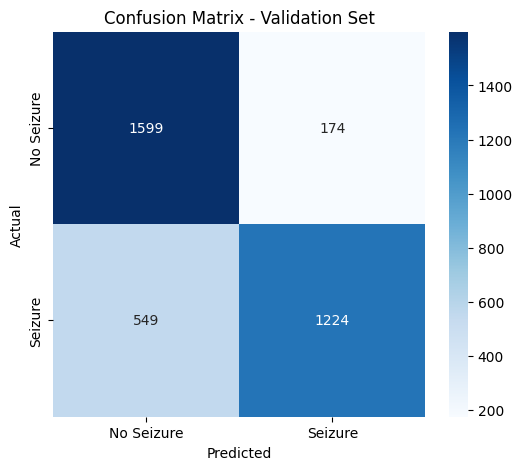

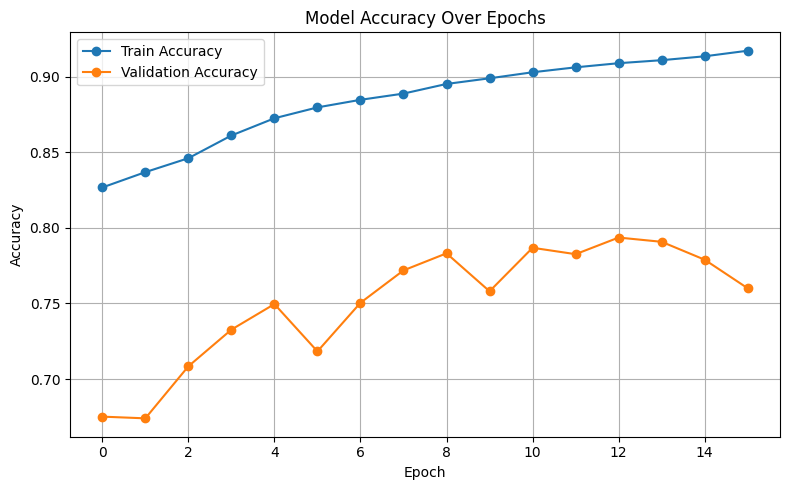

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Prediction: Seizure (1.0000)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Load EEG seizure dataset
train_data = np.load("/content/drive/MyDrive/1/eeg-seizure_train.npz")
val_data = np.load("/content/drive/MyDrive/1/eeg-seizure_val_balanced.npz")

X_train, y_train = train_data['train_signals'], train_data['train_labels']
X_val, y_val = val_data['val_signals'], val_data['val_labels']

# Normalize data
X_train = X_train.astype('float32') / np.max(np.abs(X_train))
X_val = X_val.astype('float32') / np.max(np.abs(X_val))

# Define CNN-LSTM model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop])

# Save the model
model.save("cnn_lstm_eeg_seizure_model.keras")

# Predictions and Evaluation
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int)

print("Classification Report:\n", classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Seizure", "Seizure"], yticklabels=["No Seizure", "Seizure"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Validation Set")
plt.show()

# ✅ Plot accuracy over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Interactive Prediction
def predict_single_signal(signal_array):
    signal_array = signal_array.astype('float32') / np.max(np.abs(signal_array))
    signal_array = signal_array.reshape((1, signal_array.shape[0], signal_array.shape[1]))  # (1, time, features)
    pred_prob = model.predict(signal_array)[0][0]
    pred_label = "Seizure" if pred_prob > 0.5 else "No Seizure"
    print(f"Prediction: {pred_label} ({pred_prob:.4f})")

# Example usage: test with a random signal from validation set
predict_single_signal(X_val[0])

In [ ]:
# Interactive Prediction
def predict_single_signal(signal_array):
    signal_array = signal_array.astype('float32') / np.max(np.abs(signal_array))
    signal_array = signal_array.reshape((1, signal_array.shape[0], signal_array.shape[1]))  # (1, time, features)
    pred_prob = model.predict(signal_array)[0][0]
    pred_label = "Seizure" if pred_prob > 0.5 else "No Seizure"
    print(f"Prediction: {pred_label} ({pred_prob:.4f})")

# Example usage: test with a random signal from validation set
predict_single_signal(X_val[2])
predict_single_signal(X_val[44])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: No Seizure (0.2101)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: No Seizure (0.3117)


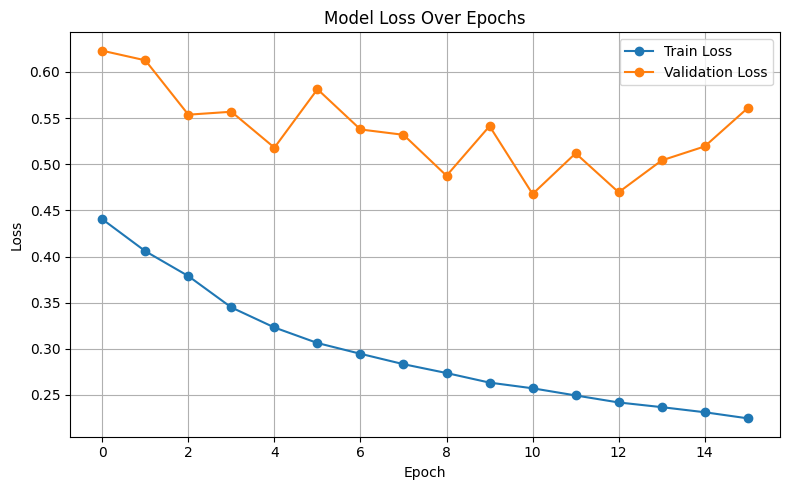

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


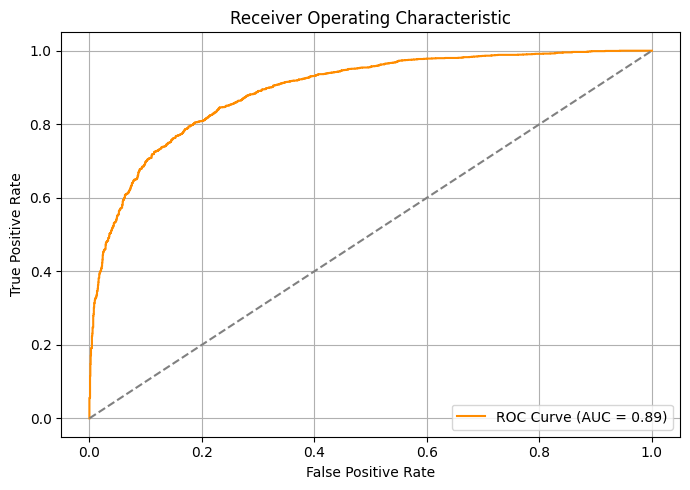

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_val, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


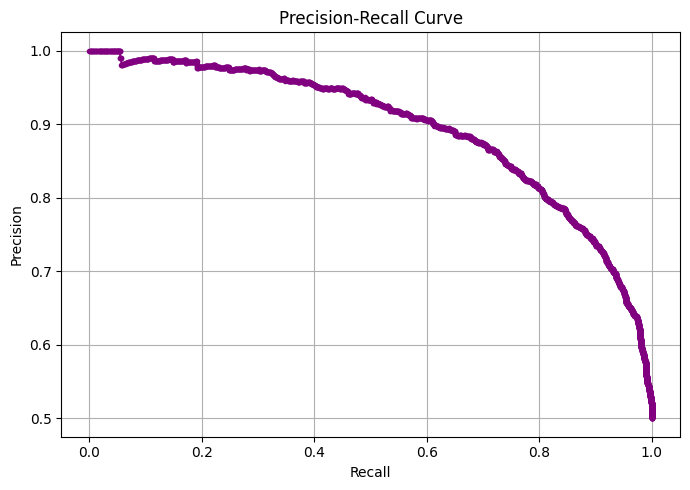

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_val, y_pred_probs)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, marker='.', color='purple')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.tight_layout()
plt.show()


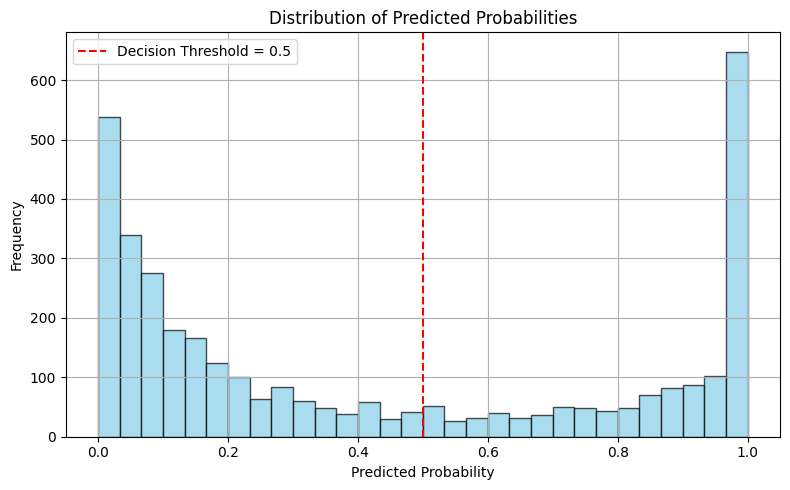

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(y_pred_probs, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(0.5, color='red', linestyle='--', label='Decision Threshold = 0.5')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


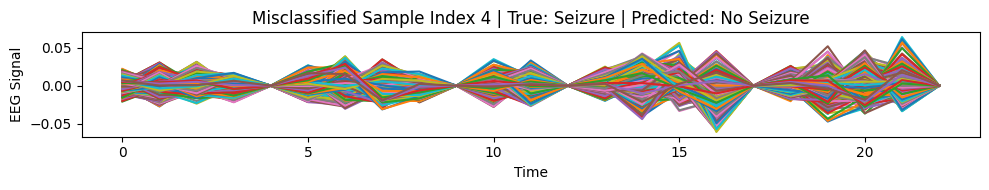

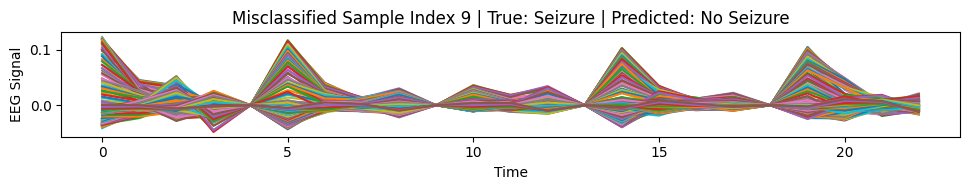

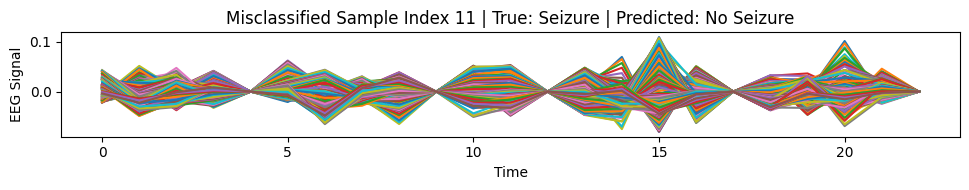

In [ ]:
wrong_indices = np.where(y_pred.flatten() != y_val)[0]

# Show 3 misclassified signals
for i in wrong_indices[:3]:
    plt.figure(figsize=(10, 2))
    plt.plot(X_val[i])
    true_label = "Seizure" if y_val[i] == 1 else "No Seizure"
    pred_label = "Seizure" if y_pred[i] == 1 else "No Seizure"
    plt.title(f"Misclassified Sample Index {i} | True: {true_label} | Predicted: {pred_label}")
    plt.xlabel("Time")
    plt.ylabel("EEG Signal")
    plt.tight_layout()
    plt.show()


<ipython-input-9-45d427e4b4f8>:13: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title="Classes", labels=["No Seizure", "Seizure"])


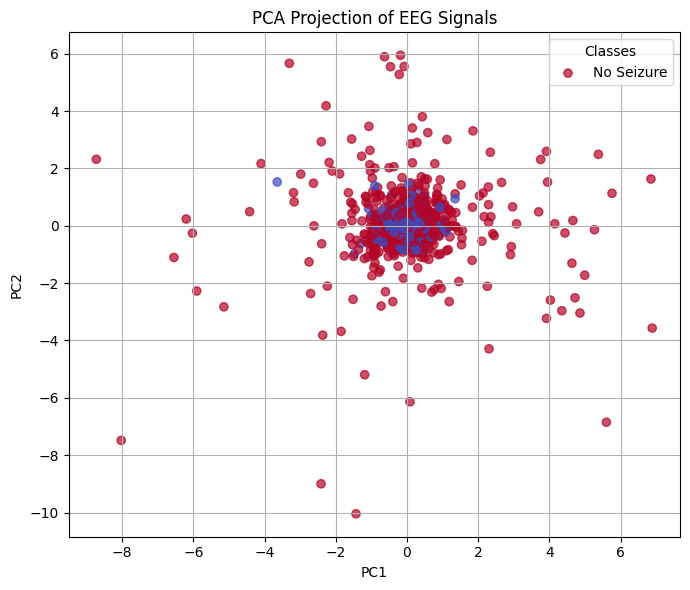

In [ ]:
from sklearn.decomposition import PCA

# Flatten time-series to 2D [samples, features*time]
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_val_flat)

# Plot
plt.figure(figsize=(7, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_val, cmap='coolwarm', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Classes", labels=["No Seizure", "Seizure"])
plt.title("PCA Projection of EEG Signals")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


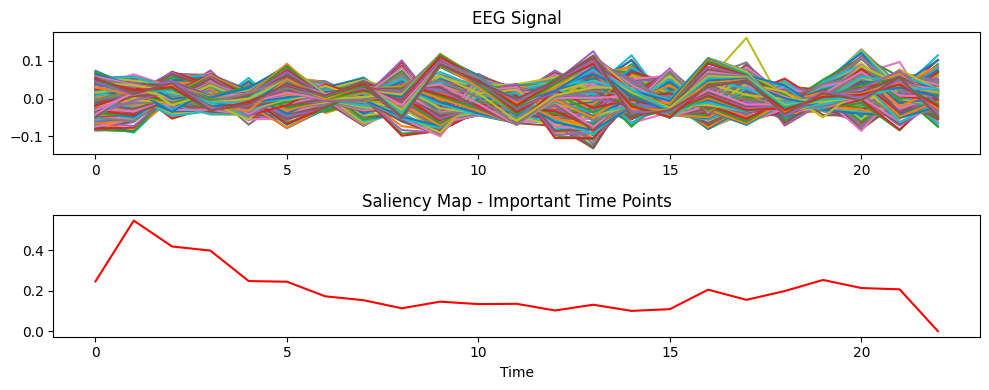

In [ ]:
import tensorflow as tf

def plot_saliency(signal_array, model):
    # Preprocess
    signal_input = tf.convert_to_tensor(signal_array.reshape(1, signal_array.shape[0], signal_array.shape[1]))
    signal_input = tf.cast(signal_input, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(signal_input)
        prediction = model(signal_input)
        loss = prediction[0][0]  # we focus on seizure probability

    # Compute gradient of output w.r.t input
    grads = tape.gradient(loss, signal_input)[0]

    # Aggregate gradients across channels
    saliency = np.max(np.abs(grads), axis=-1)

    # Plot signal and saliency
    plt.figure(figsize=(10, 4))
    plt.subplot(2, 1, 1)
    plt.plot(signal_array)
    plt.title("EEG Signal")

    plt.subplot(2, 1, 2)
    plt.plot(saliency, color='red')
    plt.title("Saliency Map - Important Time Points")
    plt.xlabel("Time")
    plt.tight_layout()
    plt.show()

# Example usage
plot_saliency(X_val[2], model)


In [ ]:
from IPython.display import display, HTML

# Function to display simulated dialog box
def seizure_alert_html(pred_prob):
    if pred_prob > 0.5:
        display(HTML(f"""
            <div style="border:2px solid red; padding:15px; background-color:#ffe6e6; font-size:18px; color:red;">
                <strong>🛑 Patient Condition Critical:</strong> Epileptic Seizure Detected<br>
                <em>Confidence: {pred_prob:.2f}</em>
            </div>
        """))
    else:
        display(HTML(f"""
            <div style="border:2px solid green; padding:15px; background-color:#e6ffe6; font-size:18px; color:green;">
                <strong>✅ Patient Status:</strong> No Seizure Detected<br>
                <em>Confidence: {pred_prob:.2f}</em>
            </div>
        """))

# Wrapper function to run prediction and show the dialog
def predict_with_html_alert(signal_array):
    signal_array = signal_array.astype('float32') / np.max(np.abs(signal_array))
    signal_array = signal_array.reshape((1, signal_array.shape[0], signal_array.shape[1]))
    pred_prob = model.predict(signal_array)[0][0]
    seizure_alert_html(pred_prob)


In [ ]:
# Example 1: Test with actual seizure case (likely seizure)
print("Testing with likely SEIZURE case:")
predict_with_html_alert(X_val[0])

# Example 2: Test with likely non-seizure case (you can loop or manually test)
print("Testing with likely NON-SEIZURE case:")
for i in range(len(y_val)):
    if y_val[i] == 0:  # 0 = No Seizure
        predict_with_html_alert(X_val[i])
        break


Testing with likely SEIZURE case:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Testing with likely NON-SEIZURE case:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
